In [908]:
import numpy as np
import pandas as pd
import sympy as sy

In [909]:
P = np.array([2*i+1 for i in range(1, 10)]).reshape((3, 3)).T
np.linalg.matrix_rank(P)

2

In [910]:
H = np.zeros((3, 7))
for col in range(H.shape[1]):
    H[:, col] = 2*np.arange(1+col, 4+col) + 1

np.linalg.matrix_rank(H)

2

In [911]:
d = 2
1/2 * (d+1) * (d+2)

6.0

In [912]:
S = np.array([
    [4*np.sqrt(2), 0],
    [0, 2*np.sqrt(2)]
])

V = np.array([
    [1/np.sqrt(2), 1/np.sqrt(2)],
    [-1/np.sqrt(2), 1/np.sqrt(2)]
])

Lambda, c = sy.symbols(["lambda", "c"])

B = sy.Matrix([
    [4, -4],
    [-2, c]
])

BBT = B @ B.T
BBT

Matrix([
[      32, -4*c - 8],
[-4*c - 8, c**2 + 4]])

In [913]:
BBT_eigenvals = list(BBT.eigenvals().keys())
print("BBT_eigenvals", BBT_eigenvals)
for idx, eigenval in enumerate(BBT_eigenvals):
    print(f"Eigenvalue {idx}:", eigenval)

eq1 = BBT_eigenvals[0] - (2*np.sqrt(2))**2
eq2 = BBT_eigenvals[1] - (4*np.sqrt(2))**2


sy.solve([eq1, eq2], c)

BBT_eigenvals [c**2/2 - sqrt((c**2 - 8*c + 52)*(c**2 + 8*c + 20))/2 + 18, c**2/2 + sqrt((c**2 - 8*c + 52)*(c**2 + 8*c + 20))/2 + 18]
Eigenvalue 0: c**2/2 - sqrt((c**2 - 8*c + 52)*(c**2 + 8*c + 20))/2 + 18
Eigenvalue 1: c**2/2 + sqrt((c**2 - 8*c + 52)*(c**2 + 8*c + 20))/2 + 18


[(-2.00000000000000,)]

In [914]:
B = np.array(B)
B[1, 1] = -2
B = B.astype(np.float64)

B @ np.linalg.inv(S @ V.T)

array([[ 1.,  0.],
       [ 0., -1.]])

In [915]:
# s_list = [3.64973815,  2.99549717,  0,  2.9468194, 
#  3.63628318,  2.20029144,  3.58499797,  2.30541867,  
# 2.44001707,  1.91864557,  2.33640267,  0.71044036, 
# 1.25885197,  1.175712,    1.82684075,  1.090066,  
#   1.73614439,  1.84846206, 2.72661025,  3.56022295, 
#  3.59882147,  5.28710702,  6.03863768,  6.76454015,
#  7.82283933,  8.07749541,  9.15639392,  9.62977085, 
# 10.6195424,  11.56870074, 11.60384656, 12.13092488,
#  12.30468568, 12.41261552, 12.53969402, 12.75664092]

# s = pd.Series(s_list, name="Time Series Data")
# s.head()

# s_list = [2.9468194,   3.63628318,  2.20029144,3.58499797, 
#  2.30541867,  2.44001707,  1.91864557,  2.33640267, 
#  0.71044036, 1.25885197,  1.175712,    1.82684075,  
# 1.090066,    1.73614439,  1.84846206, 2.72661025,  
# 3.56022295,  3.59882147,  5.28710702,  6.03863768,  
# 6.76454015, 7.82283933,  8.07749541,  9.15639392,  
# 9.62977085, 10.6195424,  11.56870074, 11.60384656, 
# 12.13092488, 12.30468568, 12.41261552, 12.53969402,
#  12.75664092]

s_list = [3.64973815,  2.99549717,  2.56877414,  2.9468194, 
 3.63628318,  2.20029144,  3.58499797,  2.30541867,  
2.44001707,  1.91864557,  2.33640267,  0.71044036, 
1.25885197,  1.175712,    1.82684075,  1.090066,  
  1.73614439,  1.84846206, 2.72661025,  3.56022295, 
 3.59882147,  5.28710702,  6.03863768,  6.76454015,
 7.82283933,  8.07749541,  9.15639392,  9.62977085, 
10.6195424,  11.56870074, 11.60384656, 12.13092488,
 12.30468568, 12.41261552, 12.53969402, 12.75664092]

s = pd.Series(s_list, name="Time Series Data")
s.head()

0    3.649738
1    2.995497
2    2.568774
3    2.946819
4    3.636283
Name: Time Series Data, dtype: float64

In [916]:
# s = pd.concat([s, pd.Series(np.zeros(3))])
s = s.reset_index().iloc[:, -1]
s = s.rename("Padded Series")

print("len(s) =", len(s))
print("sum of s =", s.sum())
s.tail()

len(s) = 36
sum of s = 198.82849271


31    12.130925
32    12.304686
33    12.412616
34    12.539694
35    12.756641
Name: Padded Series, dtype: float64

In [917]:
T = len(s)
L = 6

P = np.zeros((L, T//L))

for col in range(T//L):
    P[:, col] = s[col*L:col*L+L]

print(np.round(P, 2))

[[ 3.65  3.58  1.26  2.73  7.82 11.6 ]
 [ 3.    2.31  1.18  3.56  8.08 12.13]
 [ 2.57  2.44  1.83  3.6   9.16 12.3 ]
 [ 2.95  1.92  1.09  5.29  9.63 12.41]
 [ 3.64  2.34  1.74  6.04 10.62 12.54]
 [ 2.2   0.71  1.85  6.76 11.57 12.76]]


In [918]:
P[0, :].sum()

30.646884229999998

In [919]:
U, S, V_T = np.linalg.svd(P)
S = np.sort(S)[::-1]
S

array([41.02168371,  4.21982278,  1.40840581,  0.89810717,  0.26783936,
        0.08563239])

In [920]:
V = V_T.T

In [921]:
V[:, 0].sum()

-1.9839175833961686

In [922]:
for i in range(S.shape[0]):
    energy_ratio = S[:i+1].sum() / S.sum()
    print(f"Energy ratio at iteration {i+1}:", np.round(energy_ratio, 2))

r=2

Energy ratio at iteration 1: 0.86
Energy ratio at iteration 2: 0.94
Energy ratio at iteration 3: 0.97
Energy ratio at iteration 4: 0.99
Energy ratio at iteration 5: 1.0
Energy ratio at iteration 6: 1.0


In [923]:
S_r = np.diag(S)
S_r[r:, r:] = 0
S_r

array([[41.02168371,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  4.21982278,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [924]:
P_ = U @ S_r @ V_T
print("P_ =")
print(P_)
np.round(P_[0, :].sum(), 4)

P_ =
[[ 3.44749756  3.36687278  1.25545437  2.64059311  7.67355073 11.84103852]
 [ 3.1318397   2.69642545  1.34182112  3.5983077   8.38734103 11.75315097]
 [ 3.14487744  2.57276349  1.42238588  4.06002544  8.94977772 12.17313873]
 [ 2.88287854  1.94496577  1.53371544  5.09114599  9.82115185 12.29638578]
 [ 2.97855348  1.90336146  1.64362159  5.61167811 10.56223362 12.99648357]
 [ 2.44631961  0.84284447  1.75037337  6.99488305 11.49227451 12.655923  ]]


30.225

In [925]:
P_.sum(axis=1)

array([30.22500707, 30.90888597, 32.32296869, 33.57024336, 35.69593183,
       36.18261802])

In [926]:
Phi = P_[:-1, :].T
Y = P_[-1, :][:, np.newaxis]

Phi

array([[ 3.44749756,  3.1318397 ,  3.14487744,  2.88287854,  2.97855348],
       [ 3.36687278,  2.69642545,  2.57276349,  1.94496577,  1.90336146],
       [ 1.25545437,  1.34182112,  1.42238588,  1.53371544,  1.64362159],
       [ 2.64059311,  3.5983077 ,  4.06002544,  5.09114599,  5.61167811],
       [ 7.67355073,  8.38734103,  8.94977772,  9.82115185, 10.56223362],
       [11.84103852, 11.75315097, 12.17313873, 12.29638578, 12.99648357]])

In [927]:
Y

array([[ 2.44631961],
       [ 0.84284447],
       [ 1.75037337],
       [ 6.99488305],
       [11.49227451],
       [12.655923  ]])

In [928]:
print("Phi.shape =", Phi.shape)
print("Y.shape =", Y.shape)

beta_hat = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ Y
beta_hat

Phi.shape = (6, 5)
Y.shape = (6, 1)


array([[-1.64712269],
       [ 2.13738144],
       [-0.40330871],
       [ 0.51124967],
       [ 0.5407284 ]])

In [929]:
Y_new = P_[-1:-6:-1, -1][::-1]

for i in range(3):
    temp_arr = Y_new[i:] @ beta_hat
    Y_new = np.concatenate([Y_new, temp_arr])
Y_new

array([11.75315097, 12.17313873, 12.29638578, 12.99648357, 12.655923  ,
       15.18838465, 15.67294614, 18.66040656])

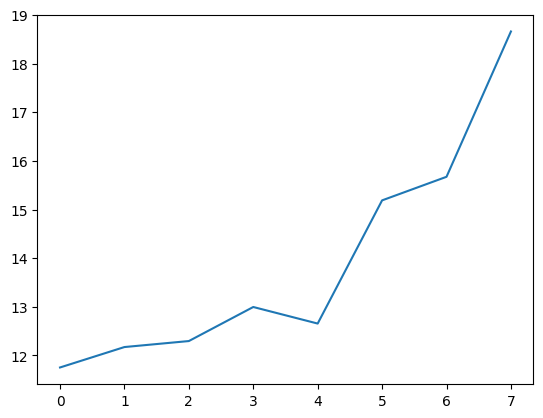

In [930]:
plt.plot(Y_new)

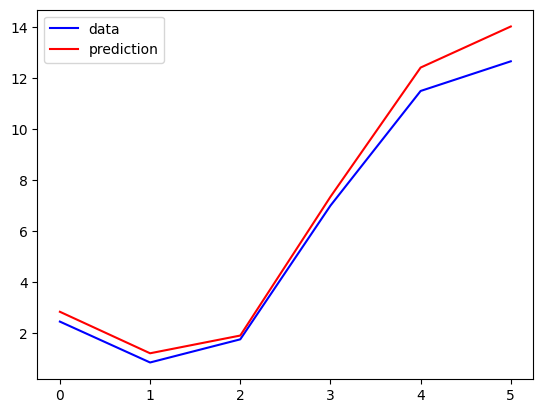

In [932]:
from matplotlib import pyplot as plt

plt.plot(Y, c="b", label="data")
plt.plot(Phi @ beta_hat, c="r", label="prediction")
plt.legend()